(512, 512)

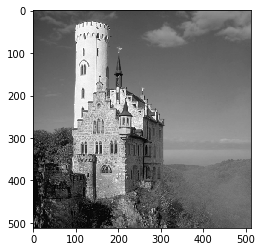

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt



image = np.array(cv2.imread('H:/CV/assignment 2/test.png',0))

plt.rcParams['image.cmap'] = 'gray'
plt.imshow(image)
image.shape